# <div style='text-align: center'> Titanic Survival Predictions </div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


### Importing rest of the required libraries

In [2]:
# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# warnings
import warnings
warnings.filterwarnings('ignore')

### lets make dataframe of train and test

In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

# Exploratory data analysis

In [4]:
# some information about the dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**We see that there are total 891 records and 12 columns, most of them are numerical. We also have a few columns with highest number of missing values like Survived, Age and Cabin**

In [5]:
# Data types of columns
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# Summary
train.describe() # by default we get the summary of numerical datatype columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Some facts

females survival percent:  74.20382165605095
males survival percent:  18.890814558058924


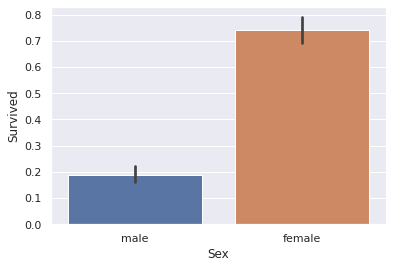

In [7]:
# Sex feature
sns.barplot(x=train.Sex, y=train.Survived)
print(f'females survival percent: ',train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)
print(f'males survival percent: ',train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Pclass 1 survival percent:  62.96296296296296
Pclass 2 survival percent:  47.28260869565217
Pclass 3 survival percent:  24.236252545824847


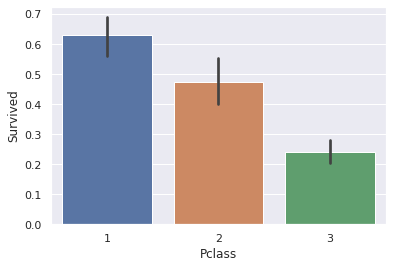

In [8]:
# Pclass feature
sns.barplot(x=train.Pclass, y=train.Survived)
print(f'Pclass 1 survival percent: ',train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)
print(f'Pclass 2 survival percent: ',train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)
print(f'Pclass 3 survival percent: ',train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

## Missing values

In [9]:
# checking missing values in train dataset
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# checking missing values in test dataset
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**We see that there are missing values in both train and test datasets. There's a great number of missing values in Cabin column so better we remove the column and fill the rest of missing values**

In [11]:
# Along with cabin columns we also need to remove a few more columns which will be meaningless in future like PassengerId, Name, Ticket, Cabin
train.drop(columns=['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)
test.drop(columns=['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

In [12]:
# Replace the Sex column male with 1 and female with 0 in train and test datasets
train['Sex'] = [1 if gender=='male' else 0 for gender in train['Sex']]
test['Sex'] = [1 if gender=='male' else 0 for gender in test['Sex']]

In [13]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [15]:
# filling the missing age values in train and test
train.Age.fillna(train.Age.median(), inplace=True)
test.Age.fillna(test.Age.median(), inplace=True)

In [16]:
# grouping the age in train and test
bins = [0,10,20,40,60,80,100]
groups = [0,2,3,4,5,6]
train['AgeGroup'] = pd.cut(train['Age'], bins, labels=groups, include_lowest=True)
test['AgeGroup'] = pd.cut(test['Age'], bins, labels=groups, include_lowest=True)

In [17]:
# so remove the age column from both train and test
train.drop(columns=['Age'], inplace=True)
test.drop(columns=['Age'], inplace=True)

In [18]:
# there is a missing value in the Fare column of test dataset so let's fill that first
test.Fare.fillna(test.Fare.median(), inplace=True)

In [19]:
# Now lets group the fare column for both train and test dataset
bins = [0,100,200,300,400,500,600]
groups = [0,1,2,3,4,5]
train['FareGroup'] = pd.cut(train['Fare'], bins, labels=groups, include_lowest=True)
test['FareGroup'] = pd.cut(test['Fare'], bins, labels=groups, include_lowest=True)

In [20]:
# Now remove the Fare column from both datasets
train.drop(columns=['Fare'], axis=1, inplace=True)
test.drop(columns=['Fare'], axis=1, inplace=True)

In [21]:
# we have missing values in Embarked column in train dataset so lets fill that first
train.Embarked.fillna(train.Embarked.mode(), inplace=True)

## One-hot encoding

In [22]:
train = pd.get_dummies(train, columns=['Pclass','AgeGroup','Embarked'])
test = pd.get_dummies(test, columns=['Pclass','AgeGroup','Embarked'])

In [23]:
train.head()

,Survived,Sex,SibSp,Parch,FareGroup,Pclass_1,Pclass_2,Pclass_3,AgeGroup_0,AgeGroup_2,AgeGroup_3,AgeGroup_4,AgeGroup_5,AgeGroup_6,Embarked_C,Embarked_Q,Embarked_S
0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1


# Modeling

### lets create the predictors and target variables from trian dataset

In [24]:
predictors = train.drop(columns=['Survived'], axis=1)

In [25]:
target = train[['Survived']]

## Create x_train,x_val,y_train,y_val 

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_val,y_train,y_val = train_test_split(predictors,target,test_size=0.2,random_state=123)

In [28]:
# lets see the shapes
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(712, 16)
(179, 16)
(712, 1)
(179, 1)


## Importing models

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [30]:
# importing accuracy 
from sklearn.metrics import accuracy_score

# Logistic Regression

In [31]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
preds = lr.predict(x_val)
lr_accuracy = accuracy_score(y_val,preds)
print(f'Logistic Regression accuracy: {lr_accuracy*100}')

Logistic Regression accuracy: 83.24022346368714


# KNN

In [32]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
preds = knn.predict(x_val)
knn_accuracy = accuracy_score(y_val, preds)
print(f'KNN accuracy: {knn_accuracy*100}')

KNN accuracy: 80.44692737430168


# Decission Tree

In [33]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preds = dt.predict(x_val)
dt_accuracy = accuracy_score(y_val, preds)
print(f'Decission Tree accuracy: {dt_accuracy*100}')

Decission Tree accuracy: 86.03351955307262


# RandomForest

In [34]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
preds = rf.predict(x_val)
rf_accuracy = accuracy_score(y_val, preds)
print(f'RandomForest accuracy: {rf_accuracy*100}')

RandomForest accuracy: 84.35754189944134


# GradientBoostClassifier

In [35]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
preds = gbc.predict(x_val)
gbc_accuracy = accuracy_score(y_val, preds)
print(f'GradientBoostClassifier accuracy: {gbc_accuracy*100}')

GradientBoostClassifier accuracy: 84.91620111731844


# SVM

In [36]:
svc = SVC()
svc.fit(x_train,y_train)
preds = svc.predict(x_val)
svc_accuracy = accuracy_score(y_val, preds)
print(f'SVC accuracy: {svc_accuracy*100}')

SVC accuracy: 84.91620111731844


In [37]:
models = pd.DataFrame({'Model':['LogisticRegression','KNN','DecissionTree','RandomForest','GradientBoostClassifier','SVM'],
         'Accuracy':[lr_accuracy*100,knn_accuracy*100,dt_accuracy*100,rf_accuracy*100,gbc_accuracy*100,svc_accuracy*100]})
models

,Model,Accuracy
0,LogisticRegression,83.240223
1,KNN,80.446927
2,DecissionTree,86.033520
3,RandomForest,84.357542
4,GradientBoostClassifier,84.916201
5,SVM,84.916201


In [38]:
data = pd.read_csv('/kaggle/input/titanic/test.csv')
ids = data['PassengerId']

In [39]:
preds = dt.predict(test)

In [40]:
output = pd.DataFrame({'PassengerId':ids, 'Survived':preds})

In [41]:
output.to_csv('submission.csv', index=False)